<a href="https://colab.research.google.com/github/Sarfaraz021/Deep-Learning/blob/main/DL_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt


In [78]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [79]:
len(X_train)

60000

In [4]:
len(y_test)

10000

In [80]:
X_train[0].shape

(28, 28)

In [81]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

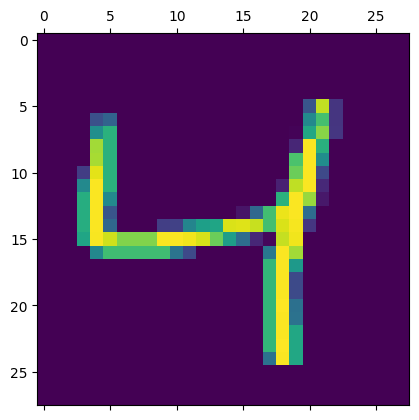

In [82]:
plt.matshow(X_train[2])

In [83]:
y_test[2]

1

Scaling the values to increase the accuracy

In [84]:
X_train = X_train/255
X_test = X_test/255

In [85]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [86]:
y_train[1]

0

In [87]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [88]:
X_test_flatten.shape

(10000, 784)

In [89]:
X_train_flatten.shape

(60000, 784)

In [90]:
 model = keras.Sequential([
     keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
 ])

 model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
 )

 model.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4724 - accuracy: 0.8748
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9262


Checking accuracy on test data

In [91]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2678 - accuracy: 0.9250


[0.26783880591392517, 0.925000011920929]

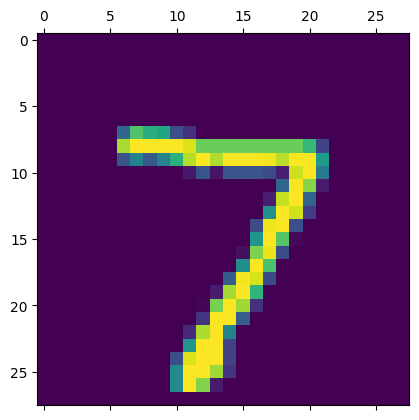

In [99]:
plt.matshow(X_test[0])

In [93]:
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


In [100]:
y_predicted[0]

array([2.7645124e-02, 3.6987740e-07, 4.1461390e-02, 9.5851946e-01,
       1.9486684e-03, 1.2818539e-01, 1.3644435e-06, 9.9983495e-01,
       9.2971556e-02, 6.5555662e-01], dtype=float32)

In [101]:
np.argmax(y_predicted[0])

7

Adding hidden layer to our model to improve the accuracy of the model



In [102]:
 model = keras.Sequential([
     keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
     keras.layers.Dense(10, activation = 'sigmoid')
 ])

 model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
 )

 model.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2663 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1205 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0842 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0642 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0500 - accuracy: 0.9844


In [104]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.9766


[0.0775664821267128, 0.9765999913215637]